## Libraries & Data

For creating this chart, we will need to load the following libraries:

- [matplotlib](/matplotlib) for creating the chart and the arrows
- [pandas](/pandas) for loading the data
- [pypalettes](/color-palette-finder): for the color palette

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from pypalettes import load_cmap

# set a higher resolution
plt.rcParams['figure.dpi'] = 250

# load the gapminder dataset
df = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv')
df = df[df['year']==df['year'].max()]
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640


## Simple bubble chart

This code uses the `ax.scatter()` function from [matplotlib](/matplotlib).

The aim of this post is to show how **arrows with inflexion points** can be used to improve this kind of chart.

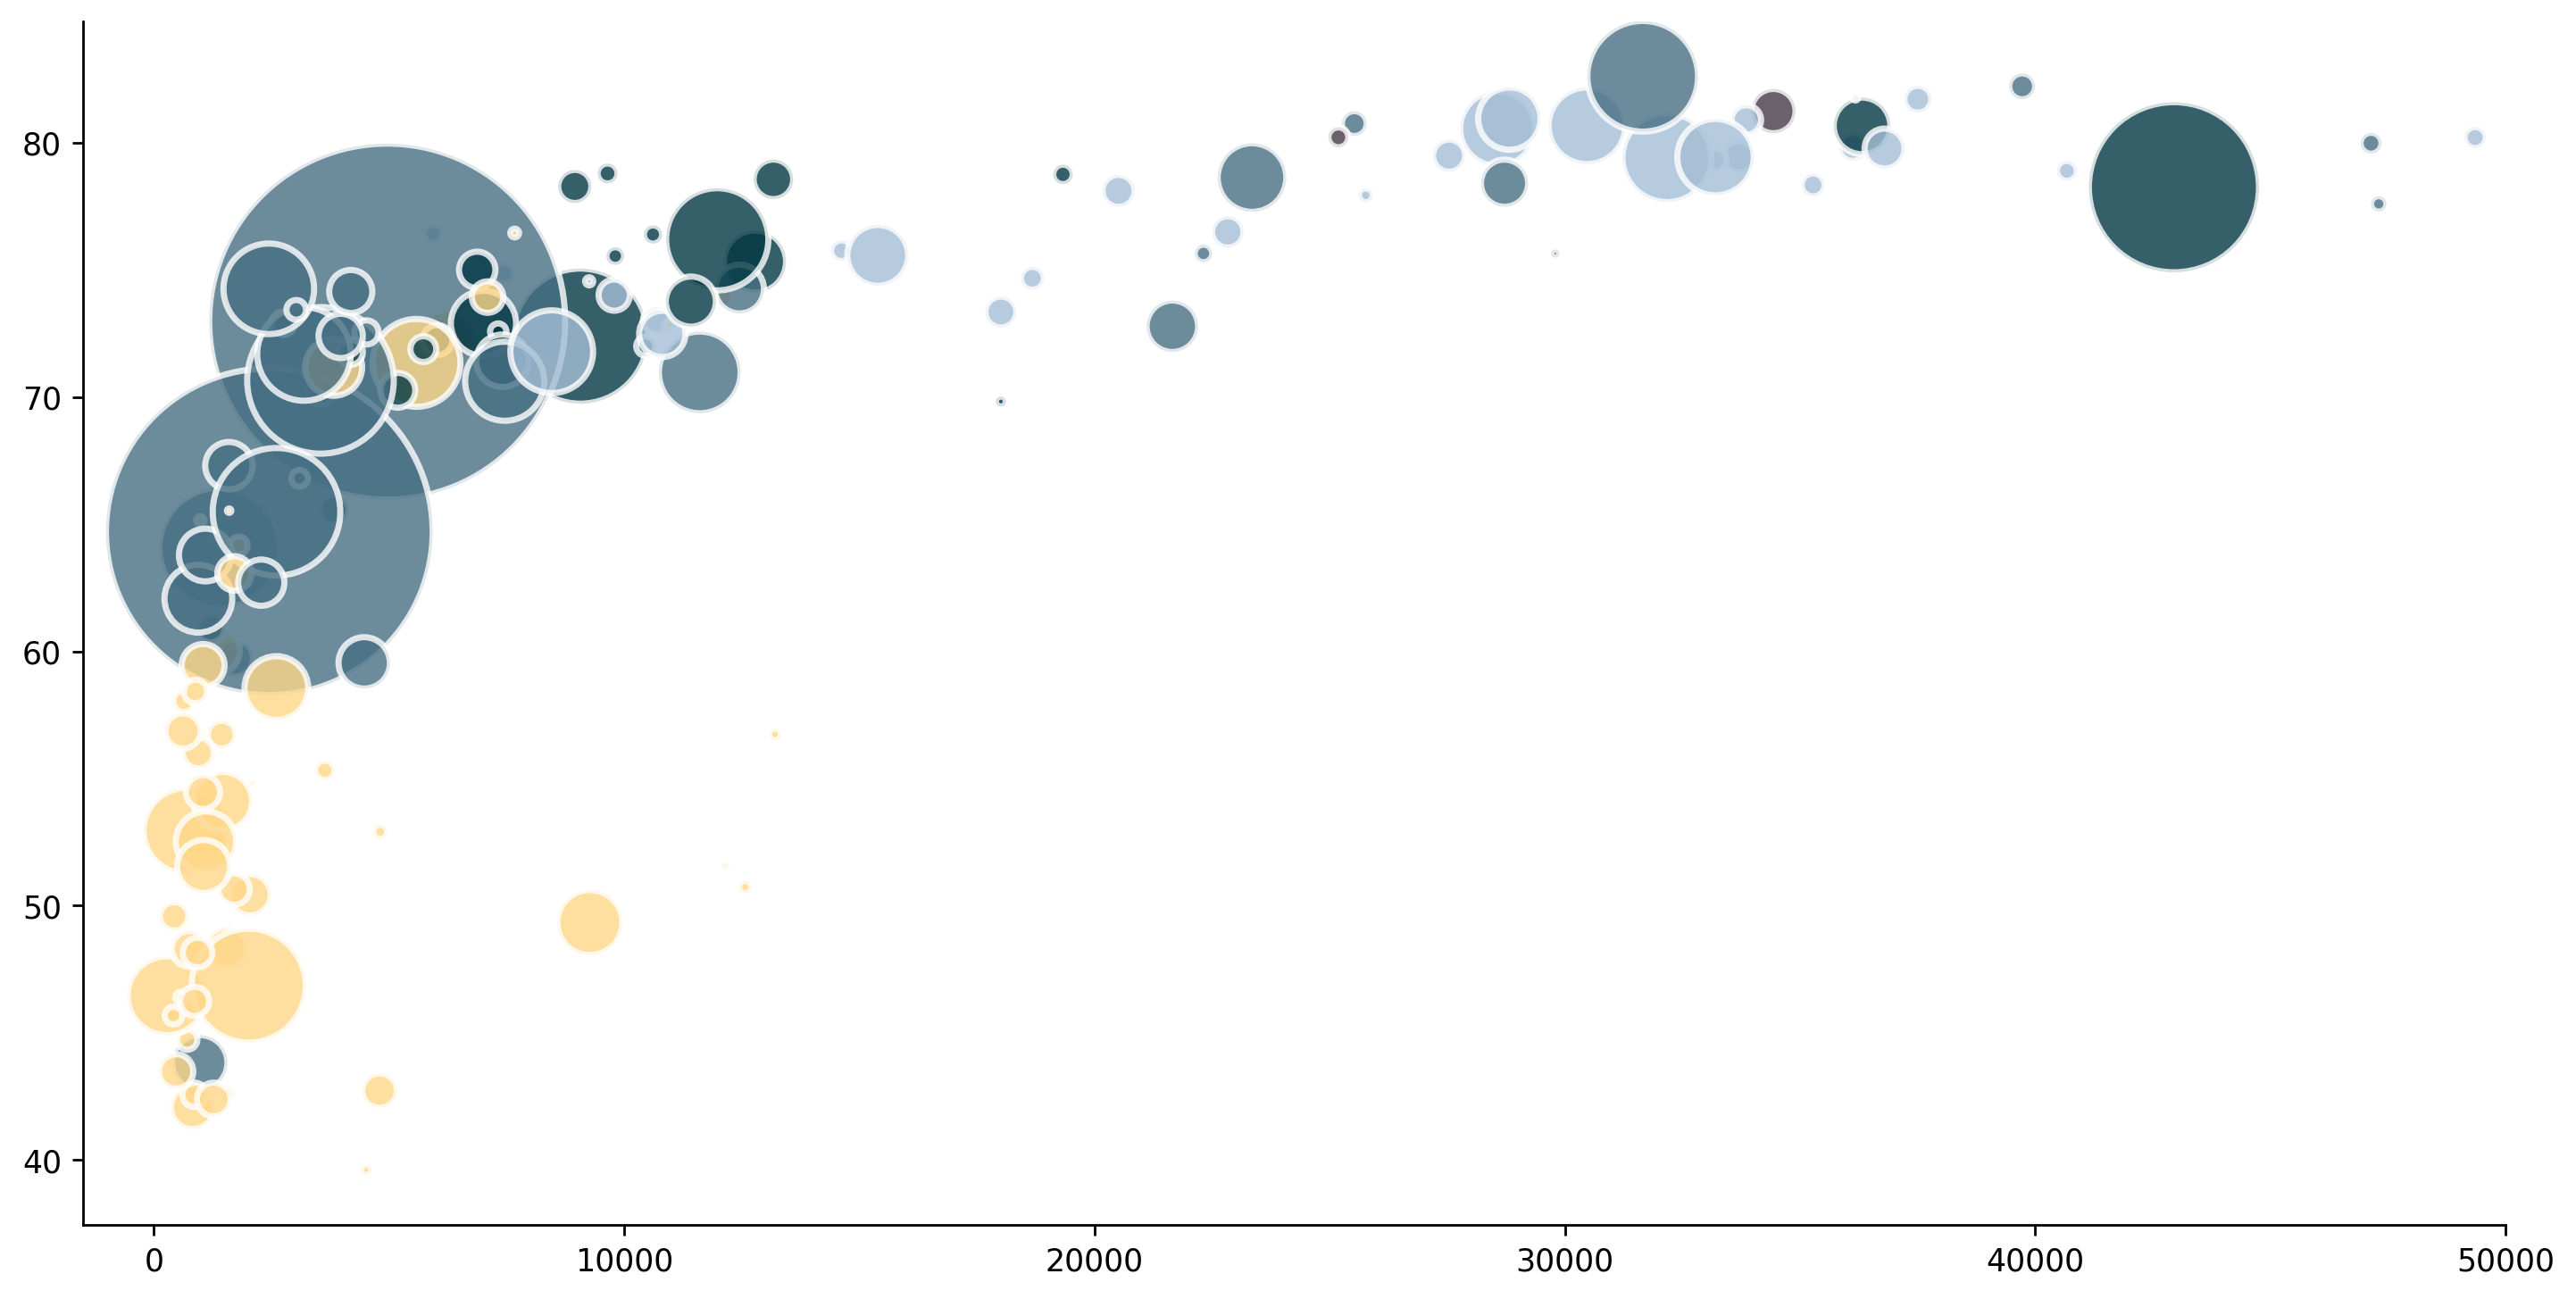

In [61]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7))
ax.set_xlim(-1500, 50000)
ax.spines[['top', 'right']].set_visible(False)

# create a bubble chart
ax.scatter(
    x = df['gdpPercap'],
    y = df['lifeExp'],
    s = df['pop']/100000,
    c = pd.Categorical(df['continent']).codes,
    cmap = load_cmap('Acadia'),
    alpha = 0.8,
    edgecolors="white",
    linewidth=2
)

# display the plot
plt.show()

## Simple arrow with an inflexion point

In order to make our code easier to read, we will create a **function** called `arrow_inflection()` that will receive the following parameters:

- an `ax`:
- a `start` and `end` point for the arrow (tuple with x and y values)
- the `angleA` and `angleB` for the arrow
- the `radius` of the inflexion point
- the `color` of the arrow (default is black)
- the `transform` for custom coordinates (default is `None`)

In [70]:
def arrow_inflexion(
   ax,
   start, end,
   angleA, angleB,
   radius=0,
   color="black",
   transform=None
):
   
   # get the coordinates
   x1, y1 = end
   x2, y2 = start
   
   # avoid division by zero
   epsilon = 1e-6
   if x2 == x1:
      x2 += epsilon
   if y2 == y1:
      y2 += epsilon
   
   # select right coordinates
   if transform is None:
      transform = ax.transData
   
   # add the arrow
   connectionstyle = f"angle,angleA={angleA},angleB={angleB},rad={radius}"
   ax.annotate(
      "",
      xy=(x1, y1), xycoords=transform,
      xytext=(x2, y2), textcoords=transform,
      arrowprops=dict(
         color=color, arrowstyle="->",
         shrinkA=5, shrinkB=5,
         patchA=None, patchB=None,
         connectionstyle=connectionstyle,
      ),
   )

The function can be a bit complex at first since it uses lots of different [matplotlib](/matplotlib) tools. Here are the main ones that we explain how to use in the gallery:
- the `transform` argument for [choosing the coordinate system](/589-how-to-change-coordinate-system)
- how to [create a simple arrows](/how-to-create-and-custom-arrows-matplotlib)
- how to [create a curved arrows](/how-to-create-and-custom-arrows-matplotlib)

Otherwise you can just use the above function like in the examples below and it will work just fine:

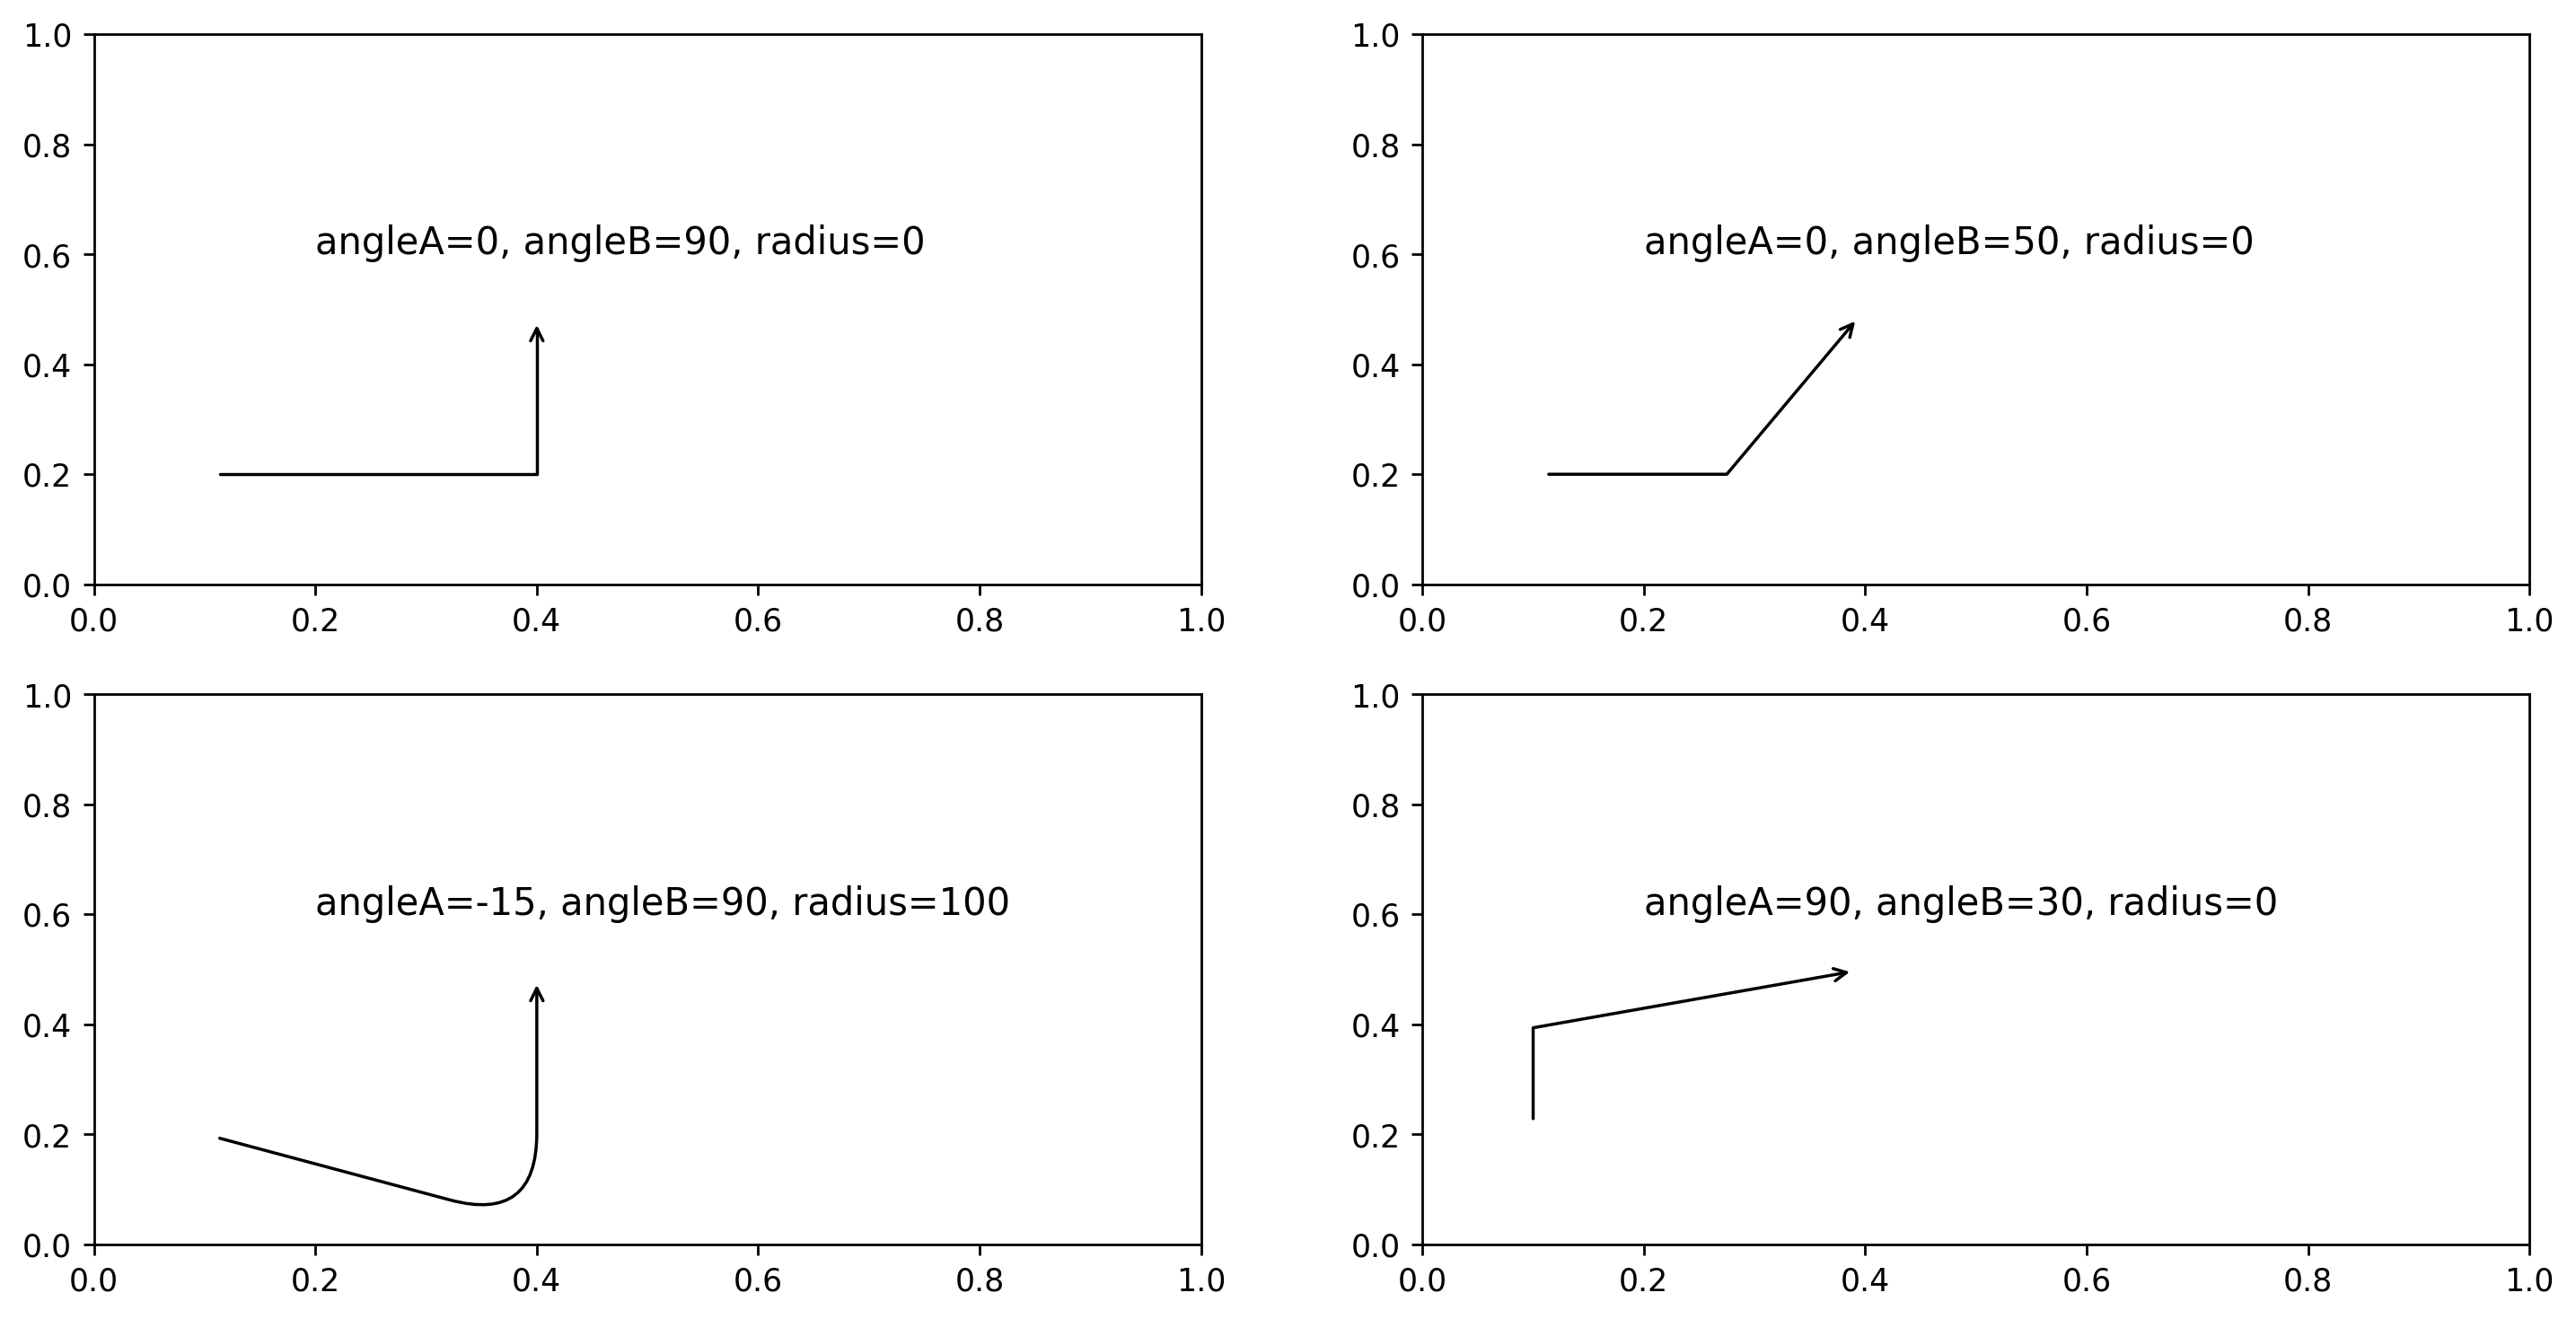

In [121]:
# initialize the figure with 4 subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,7))

# top left arrow
arrow_inflexion(ax=axs[0,0], start=(0.1, 0.2), end=(0.4, 0.5), angleA=0, angleB=90, radius=0)
axs[0,0].text(x=0.2, y=0.6, s="angleA=0, angleB=90, radius=0", fontsize=12, ha='left')

# top right arrow
arrow_inflexion(ax=axs[0,1], start=(0.1, 0.2), end=(0.4, 0.5), angleA=0, angleB=50, radius=0)
axs[0,1].text(x=0.2, y=0.6, s="angleA=0, angleB=50, radius=0", fontsize=12, ha='left')

# bottom left arrow
arrow_inflexion(ax=axs[1,0], start=(0.1, 0.2), end=(0.4, 0.5), angleA=-15, angleB=90, radius=100)
axs[1,0].text(x=0.2, y=0.6, s="angleA=-15, angleB=90, radius=100", fontsize=12, ha='left')

# bottom right arrow
arrow_inflexion(ax=axs[1,1], start=(0.1, 0.2), end=(0.4, 0.5), angleA=90, angleB=10, radius=0)
axs[1,1].text(x=0.2, y=0.6, s="angleA=90, angleB=30, radius=0", fontsize=12, ha='left')

# display the plot
plt.show()

## Combined bubble chart with arrows

The following code is based on our previous bubble chart with the use of our `arrow_inflection()` function.



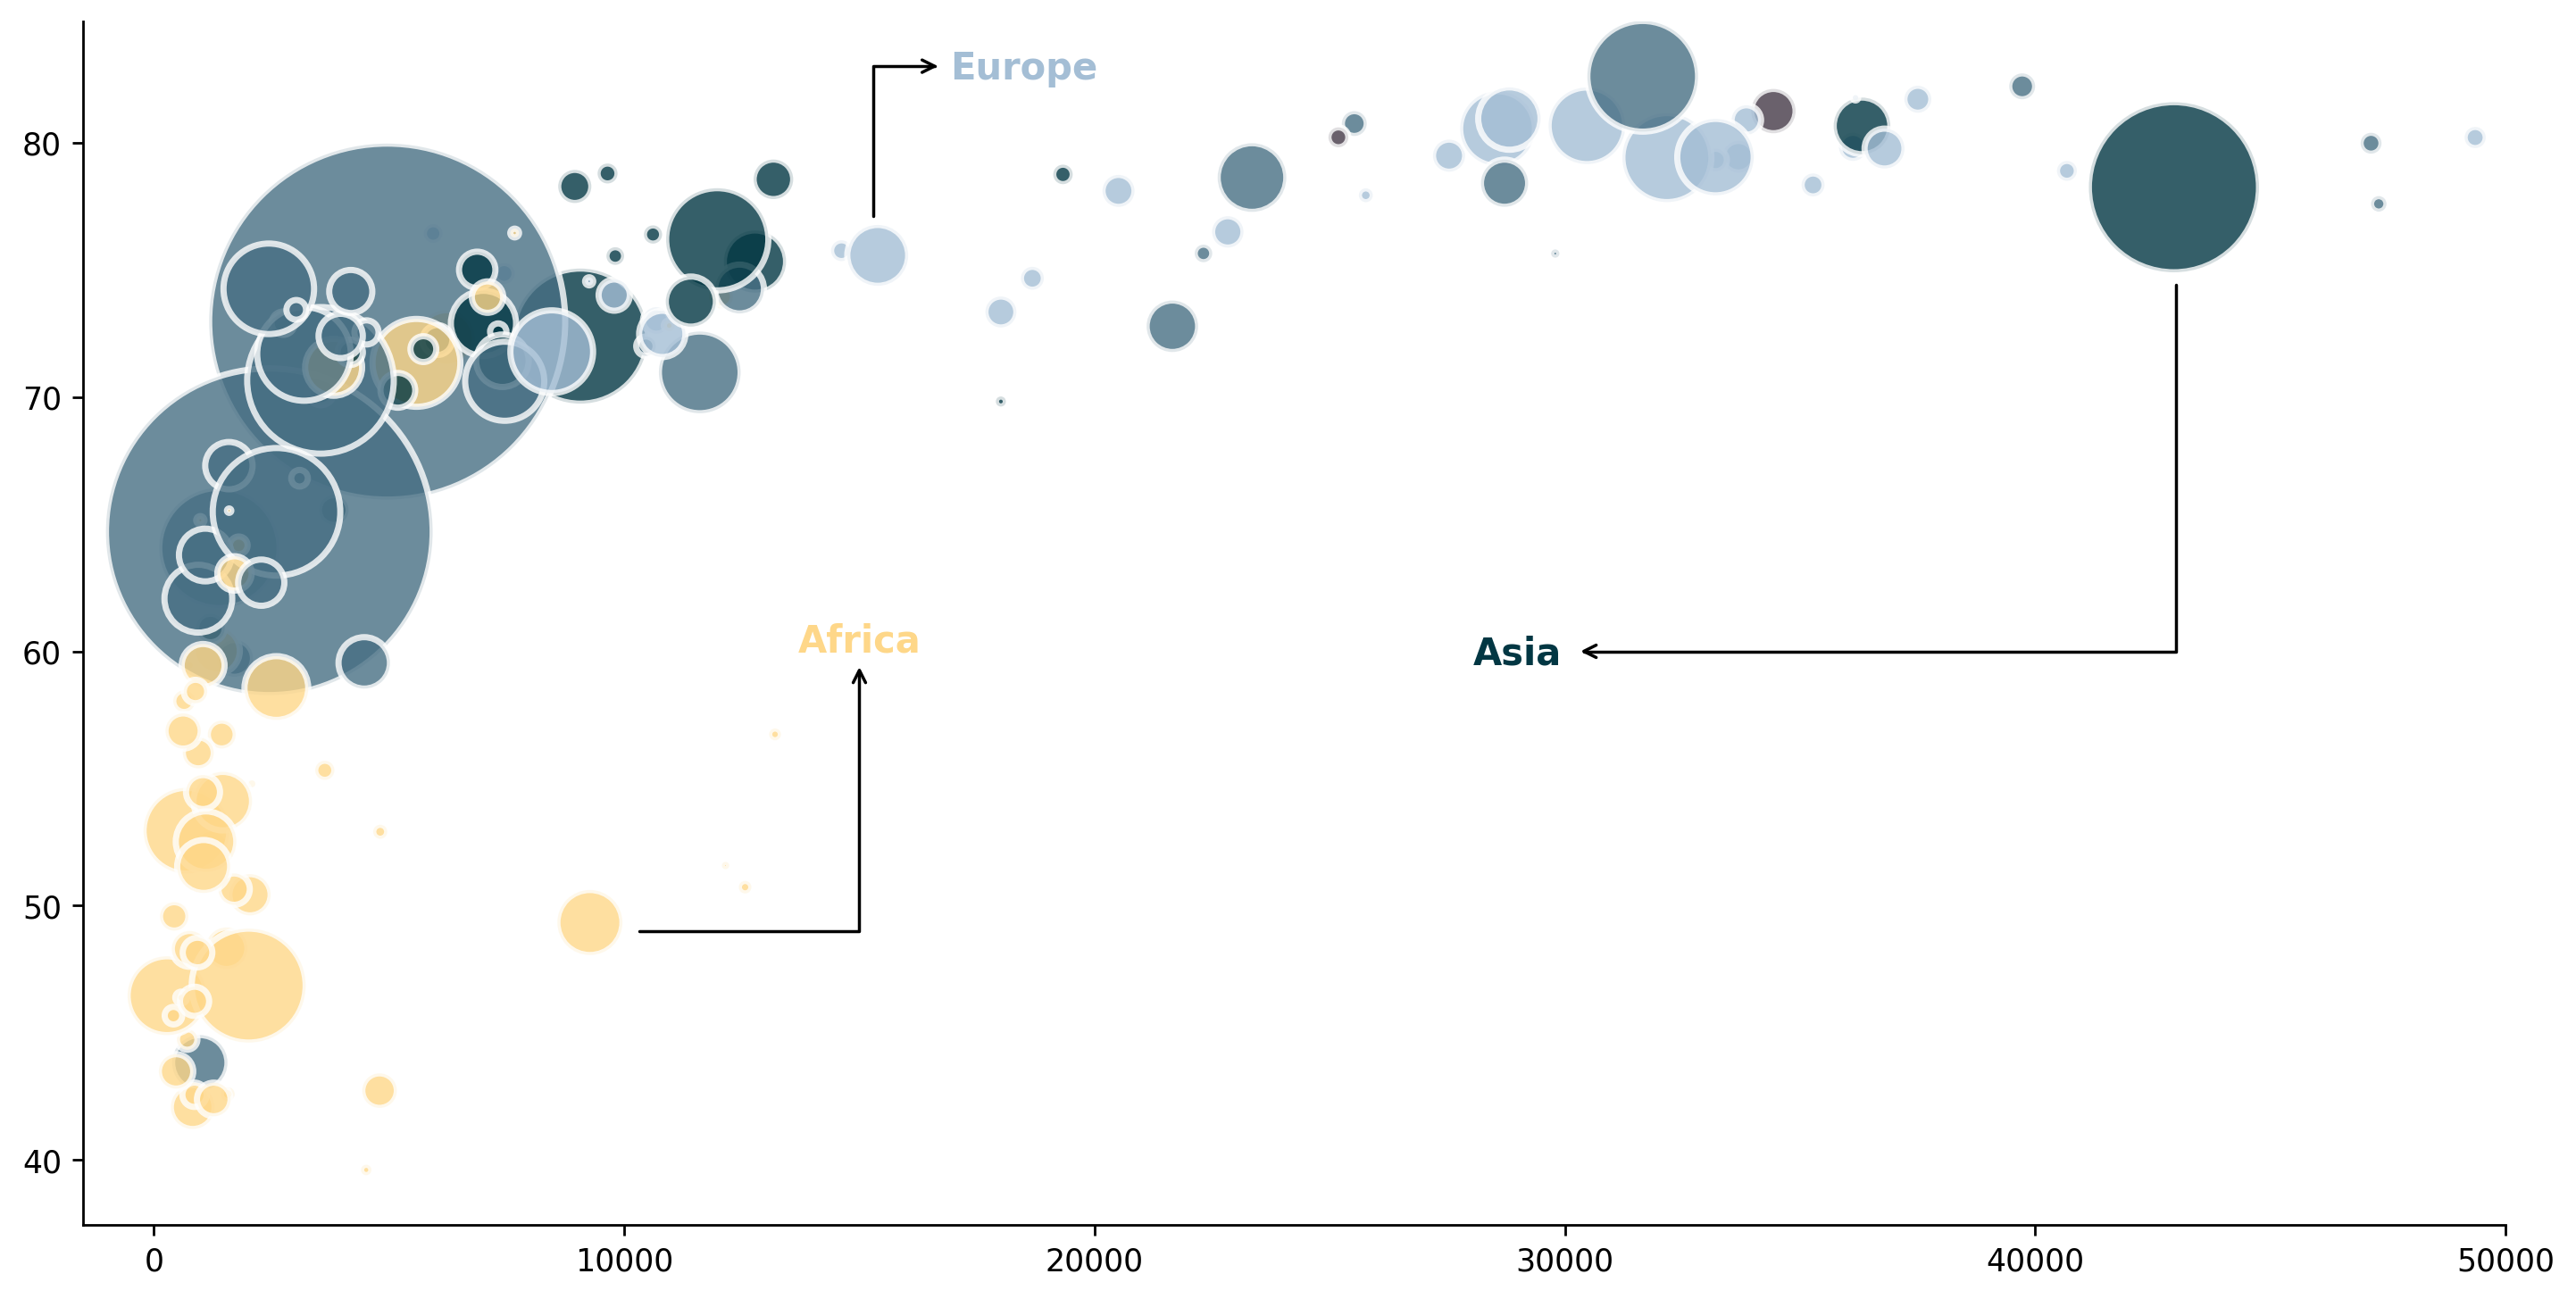

In [176]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7))
ax.set_xlim(-1500, 50000)
ax.spines[['top', 'right']].set_visible(False)
cmap = load_cmap('Acadia')

# create a bubble chart
bubble = ax.scatter(
    x = df['gdpPercap'],
    y = df['lifeExp'],
    s = df['pop']/100000,
    c = pd.Categorical(df['continent']).codes,
    cmap = cmap,
    alpha = 0.8,
    edgecolors="white",
    linewidth=2
)

# add an arrow
arrow_inflexion(ax=ax, start=(10000, 49), end=(15000, 60), angleA=0, angleB=90)
arrow_inflexion(ax=ax, start=(43000, 75), end=(30000, 60), angleA=90, angleB=0)
arrow_inflexion(ax=ax, start=(15300, 76.5), end=(17000, 83), angleA=90, angleB=0)

# simple annotation at the end of each arrow
ax.text(x=15000, y=60, s="Africa", fontsize=12, ha='center', fontweight='bold', color=cmap(0))
ax.text(x=29000, y=59.5, s="Asia", fontsize=12, ha='center', fontweight='bold', color=cmap(1))
ax.text(x=18500, y=82.5, s="Europe", fontsize=12, ha='center', fontweight='bold', color=cmap(4))

# display the plot
plt.show()

## Going further

You might be interested in:

- create annotations with [different styles](/advanced-custom-annotations-matplotlib)
- how to create [rounded arrows](/how-to-create-and-custom-arrows-matplotlib)
- customize [fonts in matplotlib](/custom-fonts-in-matplotlib)
- how to [manage subplots](/194-split-the-graphic-window-with-subplot)
